# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Create empty lists to append the API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list
for city in cities:

   # Try statement to append calls where value is found
   # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
   try:
       response = requests.get(f"{url}&q={city}").json()
       city_name.append(response["name"])
       cloudiness.append(response["clouds"]["all"])
       country.append(response["sys"]["country"])
       date.append(response["dt"])
       humidity.append(response["main"]["humidity"])
       max_temp.append(response["main"]["temp_max"])
       lat.append(response["coord"]["lat"])
       lng.append(response["coord"]["lon"])
       wind_speed.append(response["wind"]["speed"])
       city_record = response["name"]
       print(f"Processing Record {record} | {city_record}")
       print(f"&q={city}")

       # Increase counter by one
       record= record + 1

       # Wait a second in loop to not over exceed rate limit of API
       time.sleep(1.01)

   # If no record found "skip" to next call
   except:
       print("City not found. Skipping...")
   continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hilo
&q=hilo
Processing Record 2 | Nome
&q=nome
Processing Record 3 | Ekhabi
&q=ekhabi
Processing Record 4 | Punta Arenas
&q=punta arenas
City not found. Skipping...
Processing Record 5 | Cafarnaum
&q=cafarnaum
Processing Record 6 | Yellowknife
&q=yellowknife
Processing Record 7 | Fuerte Olimpo
&q=fuerte olimpo
Processing Record 8 | Kapaa
&q=kapaa
Processing Record 9 | Vaini
&q=vaini
Processing Record 10 | Berdigestyakh
&q=berdigestyakh
Processing Record 11 | Constitucion
&q=constitucion
Processing Record 12 | Ushuaia
&q=ushuaia
Processing Record 13 | San Andres
&q=san andres
Processing Record 14 | Egvekinot
&q=egvekinot
Processing Record 15 | Cayenne
&q=cayenne
Processing Record 16 | East London
&q=east london
Processing Record 17 | Lebu
&q=lebu
Processing Record 18 | Najran
&q=najran
City not found. Skipping...
Processing Record 19 | Tasiilaq
&q=tasiilaq
City not found. Skipping...
Processing Record 20 | I

Processing Record 167 | Saldanha
&q=saldanha
Processing Record 168 | Horasan
&q=horasan
Processing Record 169 | Batticaloa
&q=batticaloa
Processing Record 170 | Georgetown
&q=georgetown
Processing Record 171 | Cherskiy
&q=cherskiy
Processing Record 172 | Husavik
&q=husavik
Processing Record 173 | Biryusinsk
&q=biryusinsk
Processing Record 174 | Komsomolskiy
&q=komsomolskiy
Processing Record 175 | Narsaq
&q=narsaq
Processing Record 176 | Fortuna
&q=fortuna
Processing Record 177 | Verkhnevilyuysk
&q=verkhnevilyuysk
Processing Record 178 | Belmonte
&q=belmonte
Processing Record 179 | Lompoc
&q=lompoc
Processing Record 180 | Dunedin
&q=dunedin
Processing Record 181 | Hamilton
&q=hamilton
Processing Record 182 | Aluksne
&q=aluksne
Processing Record 183 | Lebane
&q=lebane
Processing Record 184 | Tiksi
&q=tiksi
Processing Record 185 | Adrar
&q=adrar
Processing Record 186 | Namibe
&q=namibe
Processing Record 187 | Rio de Janeiro
&q=rio de janeiro
Processing Record 188 | Hofn
&q=hofn
Processing

City not found. Skipping...
Processing Record 338 | Mana
&q=mana
Processing Record 339 | Talnakh
&q=talnakh
Processing Record 340 | Opalikha
&q=opalikha
Processing Record 341 | Privolzhsk
&q=privolzhsk
Processing Record 342 | Mangrol
&q=mangrol
Processing Record 343 | Sisimiut
&q=sisimiut
Processing Record 344 | Bambanglipuro
&q=bambanglipuro
Processing Record 345 | Sorland
&q=sorland
Processing Record 346 | Waingapu
&q=waingapu
Processing Record 347 | Storslett
&q=storslett
Processing Record 348 | Abatskoye
&q=abatskoye
Processing Record 349 | Alofi
&q=alofi
City not found. Skipping...
Processing Record 350 | Campbeltown
&q=campbeltown
Processing Record 351 | Uyuni
&q=uyuni
Processing Record 352 | Gourcy
&q=gourcy
Processing Record 353 | Comodoro Rivadavia
&q=comodoro rivadavia
Processing Record 354 | Daru
&q=daru
Processing Record 355 | Gilbues
&q=gilbues
Processing Record 356 | Goundi
&q=goundi
Processing Record 357 | Mataram
&q=mataram
Processing Record 358 | Saint-Augustin
&q=sain

Processing Record 506 | Nioro
&q=nioro
Processing Record 507 | Prince George
&q=prince george
Processing Record 508 | Vaitape
&q=vaitape
Processing Record 509 | Poum
&q=poum
Processing Record 510 | Batman
&q=batman
Processing Record 511 | Rome
&q=roma
Processing Record 512 | Masterton
&q=masterton
City not found. Skipping...
Processing Record 513 | Telimele
&q=telimele
Processing Record 514 | Port Augusta
&q=port augusta
Processing Record 515 | Jasper
&q=jasper
Processing Record 516 | Oxford
&q=oxford
Processing Record 517 | Pochutla
&q=pochutla
City not found. Skipping...
Processing Record 518 | Carnot
&q=carnot
Processing Record 519 | Syracuse
&q=syracuse
Processing Record 520 | Atar
&q=atar
Processing Record 521 | Jarocin
&q=jarocin
Processing Record 522 | Biak
&q=biak
City not found. Skipping...
Processing Record 523 | Bria
&q=bria
Processing Record 524 | Lincoln
&q=lincoln
Processing Record 525 | Vegreville
&q=vegreville
City not found. Skipping...
Processing Record 526 | Bitam
&q

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
   "City": city_name,
   "Cloudiness":cloudiness,
   "Country":country,
   "Date":date,
   "Humidity": humidity,
   "Lat":lat,
   "Lng":lng,
   "Max Temp": max_temp,
   "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values
weather_data.count()


City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [5]:
# Display data frame head
# Save data frame to CSV
#weather_data.to_csv('Output_CSV/weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,75,US,1564848679,83,19.71,-155.08,75.20,3.36
1,Nome,40,US,1564848680,62,30.04,-94.42,89.60,5.82
2,Ekhabi,0,RU,1564848681,92,53.51,142.97,55.74,10.94
3,Punta Arenas,40,CL,1564848682,70,-53.16,-70.91,42.80,31.09
4,Cafarnaum,1,BR,1564848684,31,-11.69,-41.47,84.54,7.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

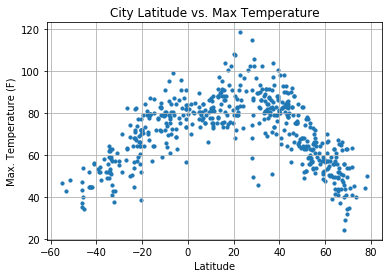

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

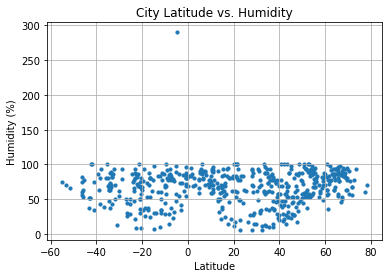

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

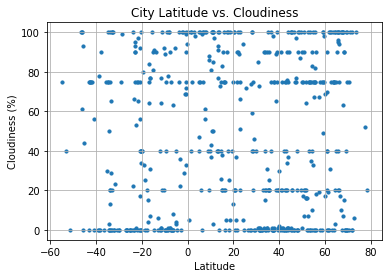

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

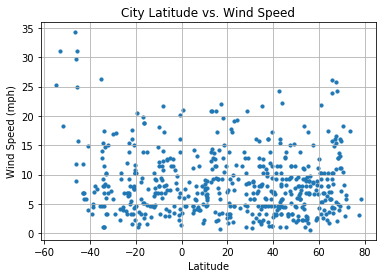

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [11]:
# Analysis
#the humidity  decreases as we move  away from  the equator
#the wind speed increases as we move away from the equator
#the temperatures increases  also as we move towards the equator however the highest temperatures are recorded at lattitude 20

